In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df_penguins = pd.read_csv('penguins.csv')

### Usunięcie ewentualnych braków - których nie ma w zbiorze

In [4]:
features = ["CulmenLength", "CulmenDepth", "FlipperLength", "BodyMass"]
X = df_penguins[features]
y = df_penguins["Species"]
X = X.dropna()
y = y.loc[X.index]

### Podział na train i test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Redukcja pipeline i redukcja wymiarów

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

print("\nSkumulowana wariancja:")
print(np.cumsum(explained_variance))

PC1: 0.6884 (68.84%)
PC2: 0.1931 (19.31%)
PC3: 0.0913 (9.13%)
PC4: 0.0271 (2.71%)

Skumulowana wariancja:
[0.68843878 0.88156797 0.97287695 1.        ]


## PC1+PC2 ~ 87%

In [10]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

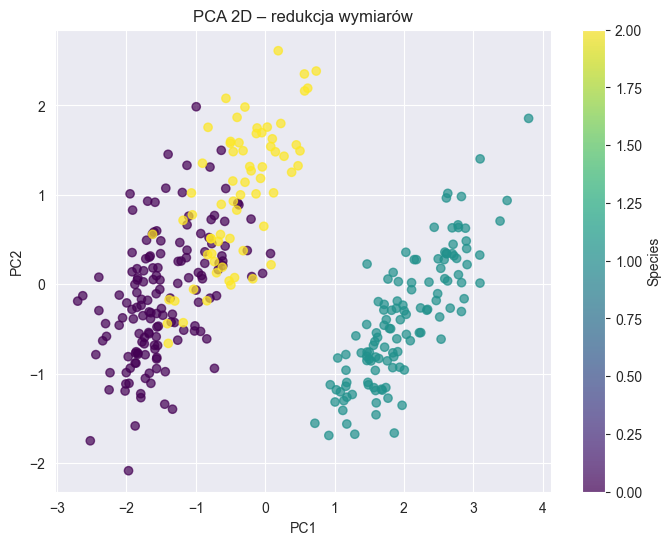

In [14]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    X_pca_2d[:, 0],
    X_pca_2d[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D – redukcja wymiarów")
plt.colorbar(scatter, label="Species")

plt.grid(True)
plt.show()

In [15]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),   # redukcja do 2 wymiarów
    ("clf", LogisticRegression(max_iter=1000))
])

In [16]:
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


In [17]:
y_pred = pipeline.predict(X_test)

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

Macierz pomyłek:
[[29  0  1]
 [ 0 25  0]
 [ 3  0 11]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       1.00      1.00      1.00        25
           2       0.92      0.79      0.85        14

    accuracy                           0.94        69
   macro avg       0.94      0.92      0.93        69
weighted avg       0.94      0.94      0.94        69



### Model KNN, jako najlepszy miał takie parametry:
   precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      1.00      1.00        25
           2       1.00      0.93      0.96        14

        accuracy                           0.99        69
       macro avg       0.99      0.98      0.98        69
       weighted avg       0.99      0.99      0.99        69



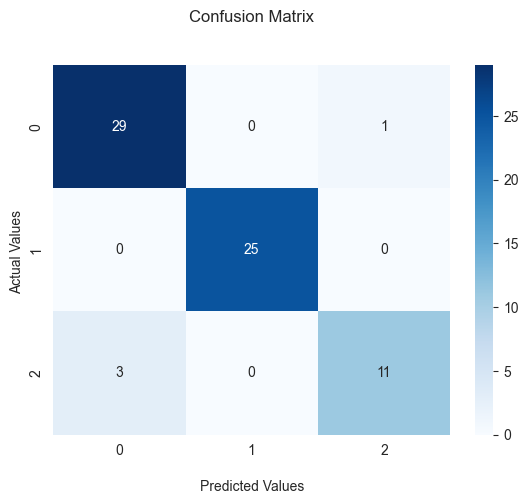

In [20]:
    import seaborn as sns
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()